In [46]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np

## Task 1: Numerical error

### Types of error

This week we begin to use numerical approaches to solve problems for which finding an analytic solution is difficult. Whenever solving a problem on a computer, one is confronted with the challenge of not being able to compute things exactly and thus introducing error into the calculation. There are two main types of error that one encounters when doing numerical calculations: truncation error and rounding (round-off) error.

Source: Guide2


----
#### 1. Analysis: Truncation Error

In Scientific Computing, truncation error comes from approximating a mathematical calculation. The term is usually associated with truncating an infinite series expansion to make computation more practical and possible. The difference between the analytical (exact) value and the truncated (approximate) calculation is the **Truncation Error**.


**Example**

Find the truncation error in calculating the first derivative of $f(x) = 7(1-x)^2$ at $x = 3$ using a step size of $h = 0.25$.


1. **Analytical Value:**
   The first derivative of $f(x) = 7(1-x)^2$ is $f'(x) = -14(1-x)$.
   At $x = 3$:
   $$f'(3) = -14(1 - 3) = -14(-2) = 28$$

2. **Approximate Value:**
   Using the forward difference formula with $h = 0.25$:
   $$f'(3) \approx \frac{f(3 + 0.25) - f(3)}{0.25}$$
   
   * $f(3.25) = 7(1 - 3.25)^2 = 7(-2.25)^2 = 35.4375$
   * $f(3) = 7(1 - 3)^2 = 7(-2)^2 = 28$
   
   $$f'(3) \approx \frac{35.4375 - 28}{0.25} = \frac{7.4375}{0.25} = 29.75$$

3. **Truncation Error (TE):**
   $$TE = \text{Exact} - \text{Approximate}$$
   $$TE = 28 - 29.75 = -1.75$$


Source: https://en.wikipedia.org/wiki/Truncation_error

---
#### 2. Analysis: Rounding error

The difference between the result produced by a given algorithm using exact calculation and the result produced by the same algorithm using finite-precision, rounded calculation.

---
#### 3. Machine epsilon

Defination: Machine epsilon ($\epsilon$) is the smallest positive value that, when added to 1.0, results in a number different from 1.0 in computer memory. 

Think about why you can not do a == b to compare two floats, rather you need to make sure that ($|b-a| < \epsilon$). This is exaclty why. 

Machines are finite devices, they do not store all the possible finite values, This creates a "gap" between representable numbers, and machine epsilon measures the size of that gap. 



In [47]:
print(f"Estimate: {(7.0/3 )- (4.0/3) -1}")

Estimate: 2.220446049250313e-16


NOTE: The error associated with the above calculation comes from doing floating-point calculations and how real numbers get represented in the computer. (For those that are interested you can google to find out why this works, but something like 4./3 – 1./3 – 1 does not (it computes to 0). Specifically, it has to do with how floating-point numbers are represented in binary.)

Source: Guide2

Ahilan's Note: I wonder if this is related to Bit Manipulation ???

# Numerical Integration:

## Task 2: Riemann Sum

In [48]:
# 1. 

def left_rieman(values, h):
    return np.sum(values[:-1]) * h # Sum heights of rectangles (excluding the very last point) 
# multiplied by width h
    


Analytic Val: 1.0


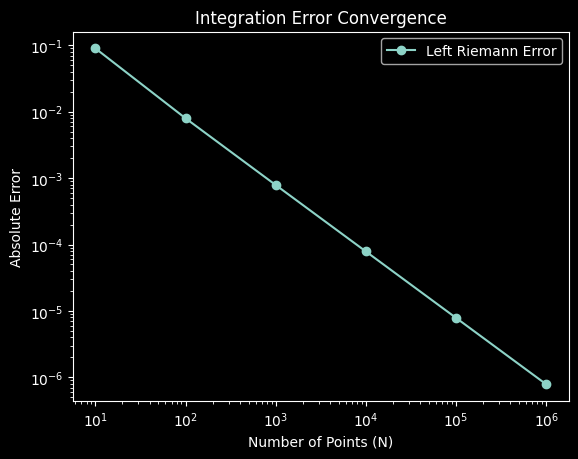

In [49]:
# 2. 
import sympy as sp

x = sp.Symbol('x')
func = sp.sin(x)

analytic_vals = float(sp.integrate(func, (x, 0, sp.pi/2)))
print(f"Analytic Val: {analytic_vals}") 


N_lst = [10, 100, 1000, 10000,100000,1000000]
errors = []
h_lst = []

a, b = 0, np.pi/2

for n in N_lst:
    
    x_vals = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    h_lst.append(h)
    
    sin_vals = np.sin(x_vals)
    
    # Compute numerical integral
    sin_int_val = left_rieman(sin_vals, h)
    
    abs_error = np.abs(analytic_vals - sin_int_val)
    errors.append(abs_error)

# 4. Plotting the error convergence
plt.loglog(N_lst, errors, marker='o', label='Left Riemann Error')
plt.xlabel('Number of Points (N)')
plt.ylabel('Absolute Error')
plt.title('Integration Error Convergence')
plt.legend()
plt.show()


### 3. 


*ANS:* 
If our error is like the function, A * h^alpha. Note that this is an exponential function. Taking the log would mean pulling down the exponential, making it a multiplication and the existing multiplication becomes an addition of logs. 

Taking the log of both sides:
$$\log(error) = \log(A * h^{\alpha}) = \log(A) + \alpha * \log(h)$$
This is a linear equation $y = mx + c$ where $y = \log(error)$, $x = \log(h)$, $m = \alpha$, and $c = \log(A)$.


Slope m is 1.0019
Intercept c is-0.6736


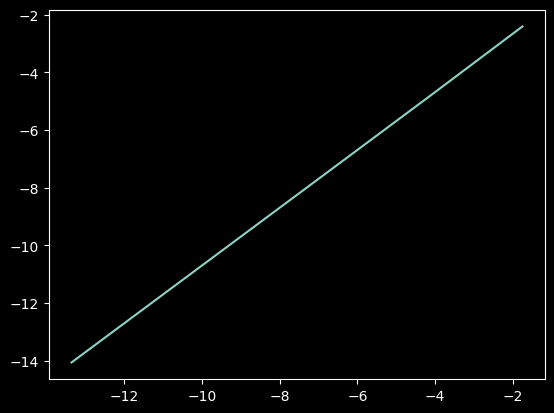

In [50]:
# 4. 

log_h = np.log(h_lst)
log_error = np.log(errors)

m,c = np.polyfit(log_h,log_error,1)

plt.plot(log_h,log_error)

print(f"Slope m is {m:.4f}")

print(f"Intercept c is{c:.4f}")


#### 5. 


*ANS:* Here the order talks what order the function is in error $=A h^\alpha$ , 
m = 1 so first order


In [51]:
# 6. 

err_needed = 1e-8
h_needed = (err_needed / np.exp(c)) ** (1/m)
N_needed = (b - a) / h_needed
print(f"Estimated h needed: {h_needed:.4e}")
print(f"Estimated N (Slices ) needed: {N_needed:.4e}")


Estimated h needed: 2.0277e-08
Estimated N (Slices ) needed: 7.7465e+07


## Task 3: Trapezoid Rule



#### 1. 

*ANS:*
Instead of what the hint suggests, which is the combination of the area of the rectangle and the triangle. Let us identify that this shape is a trapezoid.
The area of such a shape is the sum of the parallel sides plus the spacing between the parallel sides/2. 
Reference: https://www.omnicalculator.com/math/area-of-a-trapezoid and Figure 1 in Task 3

Here we Can say, Refer
Area of a trapezoid is (h/2) * (y_left + y_right).

Summing them up: Integral approx = $$(h/2)(y0 + y1) + (h/2)(y1 + y2) + ... + (h/2)(y_{N-1} + yN) = h * [ (y0 + yN)/2 + (y1 + y2 + ... + y_{N-1}) ]$$


For the three Slices this is just, 
$$\frac{h}{2} * [ (y0 + y1) + (y1+y2) + (y2+y3)]$$

$$= h * [ \frac{(y0 + y3)}{2} + (y1+y2) ]$$


In [52]:
# 2. 

import scipy.integrate as integrate


In [53]:
# 3. 
# Healthy Replacement for #?integrate.trapezoid :)) 
# I did this in the last Guide too! 

print(integrate.trapezoid.__doc__) 

# Note for Agi: This helps prevent errors running



    Integrate along the given axis using the composite trapezoidal rule.

    If `x` is provided, the integration happens in sequence along its
    elements - they are not sorted.

    Integrate `y` (`x`) along each 1d slice on the given axis, compute
    :math:`\int y(x) dx`.
    When `x` is specified, this integrates along the parametric curve,
    computing :math:`\int_t y(t) dt =
    \int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.

    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate. The default is the last axis.

    Returns
    -------
    trapezoid : float or ndarray
        

Analytic Val: 1.0


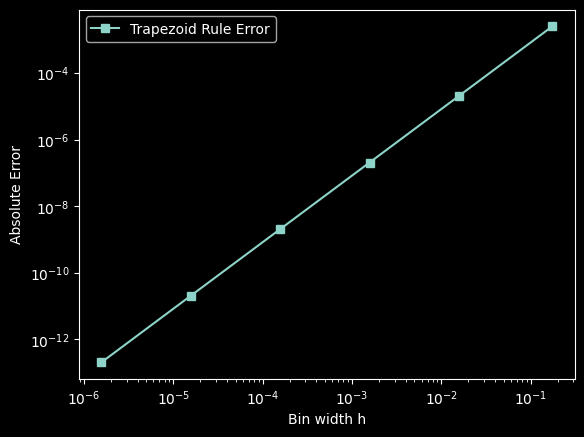

In [54]:
#4.  

# Exact integral of sin(x) from 0 to pi/2
x = sp.Symbol('x')
analytic_val = sp.integrate(sp.sin(x), (x, 0, sp.pi/2))
analytic_val = float(analytic_val) # I had an error downstream, so i need ot convert
# this Symbolic Value into float here

print(f"Analytic Val: {analytic_val}")


errors_trap = []
h_trap = []

a, b = 0, np.pi/2

for n in N_lst:
    # n grid points to n-1 slices
    x_vals = np.linspace(a, b, n)
    y_vals = np.sin(x_vals)


    h = (b - a) / (n - 1)
    h_trap.append(h)
    
    trap_val = integrate.trapezoid(y_vals, x_vals)


    errors_trap.append(abs(analytic_val - trap_val))

plt.figure()
plt.loglog(h_trap, errors_trap, 's-', label='Trapezoid Rule Error')
plt.xlabel('Bin width h')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()



#### 5. 


*ANS:* Yes, the error is significantly lower for the trapezoid rule compared to the Riemann sum for the same h.
For instance take the lowest error we achieved previosly. At 10^6 N, we had an absolute error of 10^-6. 

With the Trapeziod Rule, for this Value of N, we have an error below 10^-12!! That is way better!! 



In [55]:
# 6.  

log_h_trap = np.log(h_trap)
log_err_trap = np.log(errors_trap)

slope_trap, intercept_trap = np.polyfit(log_h_trap, log_err_trap, 1)
print(f"Trapezoid slope (alpha) =  {slope_trap:.4f}")
print(f"Trapezoid Int = {intercept_trap:.4f}")

Trapezoid slope (alpha) =  2.0000
Trapezoid Int = -2.4846


#### 7. 

y = mx + c
log(y) = 1e-08

We use the m and c values from Above and solve for x

In [56]:
# 7. contd..
desired_error = 1e-08

h_needed_trap = (desired_error / np.exp(intercept_trap)) ** (1/slope_trap)
N_needed_trap = (b - a) / h_needed_trap

print(f"Trapezoid Estimated h needed for {desired_error}: {h_needed_trap:.4e}")
print(f"Trapezoid Estimated N needed for {desired_error}: {N_needed_trap:.4e}")


Trapezoid Estimated h needed for 1e-08: 3.4640e-04
Trapezoid Estimated N needed for 1e-08: 4.5347e+03


### Task 4

In [57]:
# 1. 
print(integrate.simpson.__doc__)


    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.

    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : float, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.

    Returns
    -------
    float
        The estimated integral computed with the composite Simpson's rule.

    See Also
    --------
    quad : adaptive quadrature using QUADPACK
    fixed_quad : fixed-order Gaussian quadrature
    dblquad : double integrals
    tplquad : triple integrals
    romb : integrators for sampled data
    cumulative_trapezoid : cumulative integration for sampled data
    cumulative_simpson : cumulative integration using Simpson's 1/3 rule

    N

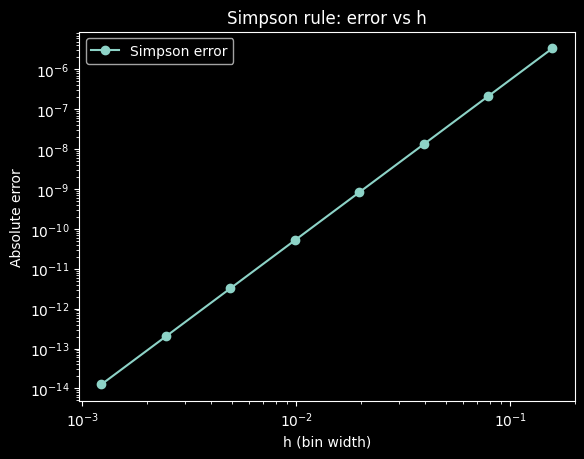

In [58]:
# 2.  


# Exact integral of sin(x) from 0 to pi/2
x_sym = sp.Symbol('x')
analytic_val = sp.integrate(sp.sin(x_sym), (x_sym, 0, sp.pi/2))
analytic_val = float(analytic_val) # I had an error downstream, so i need ot convert
# this Symbolic Value into float here


a, b = 0.0, np.pi/2

N_slices_list = [10, 20, 40, 80, 160, 320, 640, 1280]  
h_list_simpson = []
errors_simpson = []

for N_slices in N_slices_list:
    N_pts = N_slices + 1            
    x = np.linspace(a, b, N_pts)
    y = np.sin(x)

    h = (b - a) / N_slices
    h_list_simpson.append(h)

    approx = integrate.simpson(y, x=x)  
    abs_err = abs(analytic_val - approx)
    errors_simpson.append(abs_err)

# Plot error vs h (log–log)
plt.figure()
plt.loglog(h_list_simpson, errors_simpson, 'o-', label='Simpson error')
plt.xlabel('h (bin width)')
plt.ylabel('Absolute error')
plt.title('Simpson rule: error vs h')
plt.legend()
plt.show()


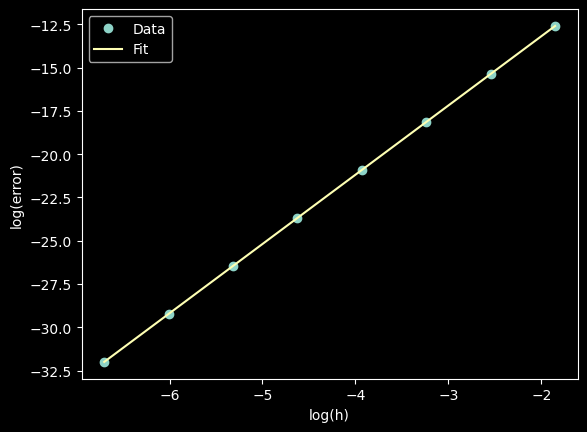

Simpson slope (alpha) = 3.9999
Intercept = -5.1924


In [59]:
# 3.   

log_h_simpson = np.log(h_list_simpson)
log_err_simpson = np.log(errors_simpson)

slope_simpson, intercept_simpson = np.polyfit(log_h_simpson, log_err_simpson, 1)

fit_line = slope_simpson * log_h_simpson + intercept_simpson

plt.figure()
plt.plot(log_h_simpson, log_err_simpson, 'o', label='Data')
plt.plot(log_h_simpson, fit_line, '-', label='Fit')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.legend()
plt.show()


print(f"Simpson slope (alpha) = {slope_simpson:.4f}")
print(f"Intercept = {intercept_simpson:.4f}")


ANS: It is again definately order 4, as alpha from error $=Ah^\alpha $, or slope is 4. 

In [60]:
# 4.  

desired_error = 1e-08

h_needed_simpson = (desired_error / np.exp(intercept_simpson)) ** (1/slope_simpson)
N_needed_simpson = (b - a) / h_needed_simpson

print(f"simpson Estimated h needed for {desired_error}: {h_needed_simpson:.4e}")
print(f"simpson Estimated N needed for {desired_error}: {N_needed_simpson:.4e}")


simpson Estimated h needed for 1e-08: 3.6620e-02
simpson Estimated N needed for 1e-08: 4.2895e+01


In [61]:
# 6.  


from timeit import default_timer as timer

# exact value
x_sym = sp.Symbol('x')
analytic_val = sp.integrate(sp.sin(x_sym), (x_sym, 0, sp.pi/2))
a, b = 0.0, np.pi/2


N_needed = int(N_needed) 
N_needed_trap = int(N_needed_trap)
N_needed_simpson = int(N_needed_simpson)

# Riemann (left)
start = timer()

x_vals = np.linspace(a, b, N_needed + 1)
h = (b - a) / N_needed
y_vals = np.sin(x_vals)
riem_val = np.sum(y_vals[:-1]) * h

t_riem = timer() - start
err_riem = abs(riem_val - analytic_val)
print(f"Riemann: value={riem_val:.10f}, error={err_riem:.2e}, time={t_riem:.3e} s")



# Trapezoid
start = timer()

x_vals = np.linspace(a, b, N_needed_trap + 1)
y_vals = np.sin(x_vals)
trap_val = integrate.trapezoid(y_vals, x_vals)

t_trap = timer() - start
err_trap = abs(trap_val - analytic_val)
print(f"Trapezoid: value={trap_val:.10f}, error={err_trap:.2e}, time={t_trap:.3e} s")



# Simpson

start = timer()

x_vals = np.linspace(a, b, N_needed_simpson + 1)
y_vals = np.sin(x_vals)
simp_val = integrate.simpson(y_vals, x=x_vals)

t_simp = timer() - start
err_simp = abs(simp_val - analytic_val)
print(f"Simpson: value={simp_val:.10f}, error={err_simp:.2e}, time={t_simp:.3e} s")


Riemann: value=0.9999999899, error=1.01e-8, time=7.313e-01 s
Trapezoid: value=0.9999999900, error=1.00e-8, time=9.531e-02 s
Simpson: value=1.0000000109, error=1.09e-8, time=2.137e-04 s


ANS: Definitely the Simpson Method

### Task 5: Gaussian Quadrature 

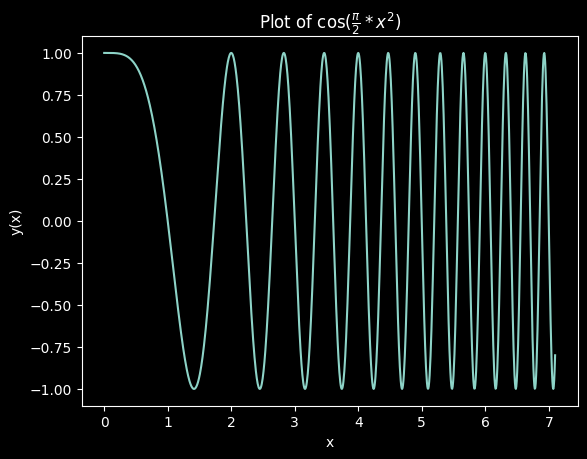

In [62]:
#1. 

x_fres = np.linspace(0, 7.1, 1000)
y_fres = np.cos((np.pi/2) * x_fres**2 )

plt.figure()
plt.plot(x_fres, y_fres)
plt.title(r'Plot of $\cos(\frac{\pi}{2} * x^2 )$')
plt.ylabel("y(x)")
plt.xlabel('x')
plt.show()


#### 2. 

*ANS:* Yes, the function oscillates more and more rapidly as x increases. Uniform spacing will definitely miss the peaks and troughs of the high-frequency oscillations if the step size $h$ isn’t small enough (or if we don’t use enough points), we miss smapling the points of the function, leading to significant errors. This is what Nyusit Sampling Theorum also tells us. 


In [63]:
# 3.  


from scipy.special import fresnel

Sin, Cos = fresnel(7.1)
true_val_fresnel = Cos
print(f"Value at x=7.1: {true_val_fresnel}")


Value at x=7.1: 0.4733111966965908


In [64]:
# 4. 

a_f = 0 # Start of our integral Range
b_f = 7.1 # End of our range
target_error = 1e-8

errors_simpson = []
Ns_simpson = []


start = 100
for N in range(start, 100000, 1): # I am basically doing a linear Search starting from my start value
    x = np.linspace(a_f, b_f, N+1) 
    y = np.cos((np.pi/2) * x**2 ) 


    simpson_vals = integrate.simpson(y, x=x)
    err = abs(true_val_fresnel - simpson_vals)
    errors_simpson.append(err)
    Ns_simpson.append(N)
    if err < target_error: # Each time, I test and see if I have reached my target
        print(f"N = {N} gives error {err:.1e} < 1e-8")
        break # And stop when I Have reached 


N = 1742 gives error 1.0e-08 < 1e-8


Notes: A method known as Gaussian quadrature (see Wikipedia or Numerical Recipes 4.6 for more info) uses non-uniformly spaced points to evaluate the integral. In short, if doing quadrature of order N, it finds N points in the domain such that if the function were a polynomial of degree less than or equal to 2N-1, then the resulting approximate formula would be exact. (The downside of quadrature is that you need to have a mathematical expression for the function you are trying to integrate. In many situations we won’t know the function directly and will just have it evaluated at a set of points, in which case we can use the other methods.)

In [65]:
def fresnel_integrand(x):
    return np.cos((np.pi/2) * x**2 ) 


for n_order in range(10, 200, 1):
    val, ignored = integrate.fixed_quad(fresnel_integrand, a_f, b_f, n=n_order)
    err = abs(true_val_fresnel - val)
    if err < 1e-8:
        print(f"fixed_quad: n={n_order} gives error {err:.1e} < 1e-8")
        break


fixed_quad: n=43 gives error 4.5e-10 < 1e-8


AGI's Notes: **IMP IMP IMP !**

scipy.integrate.quad IS THE LIBRARY USUALLY TO USE TO DO INTEGRALS NUMERICALLY. 
calls Fortran’s QUADPACK library to carry out the integrals. It can even do integrals ranging from 𝑥 = ±∞.

In [66]:
# 6.  

def gauss(x):
    return np.exp(-x**2 / 2)

val, error_est = integrate.quad(gauss, -np.inf, np.inf)
exact_gauss = np.sqrt(2 * np.pi) # Given in Guide

print(f"Quad result: {val}")
print(f"Exact result (Given): {exact_gauss}")
print(f"Difference: {val - exact_gauss}")


Quad result: 2.5066282746309994
Exact result (Given): 2.5066282746310002
Difference: -8.881784197001252e-16


### Task 6: Monte Carlo integration

Notes: 
Monte Carlo integration. (Encounter it again when looking at problems in statistical physics). 

Imagine we have some function 𝑓(𝑥) that we want to integrate over the interval 𝑎≤𝑥≤𝑏. Using the definition of the average <𝑓> of the function over the region,
$$∫𝑓(𝑥)d𝑥𝑏𝑎 = (𝑏−𝑎) ⟨𝑓⟩$$

Using this, we can compute the integral if we can reliably estimate the average value of the function over the region. We could simply do this by sampling N points {𝑥𝑖} uniformly over the region and computing the average
$$\langle f \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)$$

The advantage of Monte Carlo sampling is that it can reliably estimate the average with only a few samples. This is particularly useful for integrals in higher dimensions where it is typically the best approach. However, it has drawbacks. If the function is pathological, many samples may be required in order to get the desired tolerance. Another drawback is that it can be horribly inefficient. For example, if we have a function that (unknowingly) happens to be zero over a large part of the domain, we end up wasting time sampling from these regions.

AGI NOtes: 

Think of measuring the average volume of a noisy song:

Grid method: sample every millisecond then super precise in 1D, but in “higher dimensions” this becomes insane.

Monte Carlo: pick random times in the song and average the measured amplitude then each measurement is noisy, but the average stabilizes as you take more samples.

This is the concept of MonteCarlo Sampling

We are trying to use the Law of Large numbers that as We sample N towards inf, we get the right value

In [67]:
# 1. 


Ns_mc = np.logspace(1, 6, 20) # To get a Log Spaced Set input # You must input the start value as the Number
# on top of the Base. so input The start and stop from Base ** start and Base**stop


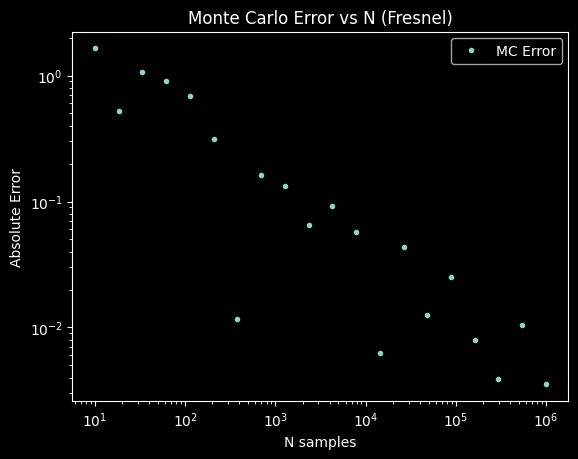

In [68]:
# 2. 
errors_mc = []

for N in Ns_mc:
    x_rand = np.random.uniform(a_f, b_f, int(N)) # Unifrom Random Samples from the a to b range, [0,7.1] here
    # And we take N sample
    
    f_vals = fresnel_integrand(x_rand)
    mean_val = np.mean(f_vals) # Taking the Mean
    integral_val = (b_f - a_f) * mean_val
    
    errors_mc.append(np.abs( true_val_fresnel - integral_val))

plt.figure()
plt.loglog(Ns_mc, errors_mc, '.', label='MC Error')
plt.xlabel('N samples')
plt.ylabel('Absolute Error')
plt.title('Monte Carlo Error vs N (Fresnel)')
plt.legend()
plt.show()

#### 3.

*ANS:* The error trends down but very slowly and is pretty noisy. 

Issue, For 1D smooth functions, grid methods would be much faster and more accurate.
Plus, you probably need a lot of compute to reach the accurate value at situations when grid is easier.
Also, you might need inverse problems to sometimes find the right N that will give you an accuracy of your satisfaction. 


Agi Notes: 
To estimate the volume of a complicated region $S$, we:

- Embed $S$ inside a region $B$ with known volume, 

- throw random points uniformly in $B$, and see what fraction land inside $S$.

Then:
$$Vol(S) \approx Vol(B) \times \frac{\text{Nos. points inside } S}{\text{total Nos. points}}.$$


This is smart!

In [ ]:
#4.  


# Monte Carlo Volume of 5D Sphere
# We enclose the sphere in a 5D box of [-1, 1] in each dimension.
# Volume of box = 2^5 = 32. (becase radius of -1 to 1 would give a length of 2!!!)


#To sample randomly, If sum(x^2) <= 1, the point is inside.
# Volume_sphere approx = Volume_box * (Fraction inside)


Ns_sphere = np.logspace(2, 8, 20)
vol_errors = []
vol_estimates = []


box_volume = 2**5  # Known Volume

exact_vol_5d = 8 * np.pi**2 / 15

for N in Ns_sphere:
    N = int(N)
    # Sample N random points in 5D cube [-1, 1]^5
    pts = np.random.uniform(-1, 1, size=(N, 5))  # shape (N, 5)

    # Squared radius for each point
    r2 = np.sum(pts**2, axis=1)

    # Points inside the unit 5D sphere
    inside = r2 <= 1.0
    count_inside = np.sum(inside)

    # Monte Carlo estimate of sphere volume
    fraction_inside = count_inside / N
    vol_est = box_volume * fraction_inside

    vol_estimates.append(vol_est)
    vol_errors.append(abs(vol_est - exact_vol_5d))

print("Largest N:", Ns_sphere[-1])
print("Monte Carlo volume at largest N:", vol_estimates[-1])




#### 5. 

Note: Exact volume of 5D unit sphere is = $$\frac{8}{15} * \pi^2 * R^5 $$

Reference: https://en.wikipedia.org/wiki/Volume_of_an_n-ball, Go to the Table 

In [ ]:
# 5 contd. 

R = 1
exact_vol_5d = (8/15) * np.pi**2 * R**5
print(f"Exact 5D Volume: {exact_vol_5d}")


Exact 5D Volume: 5.263789013914324


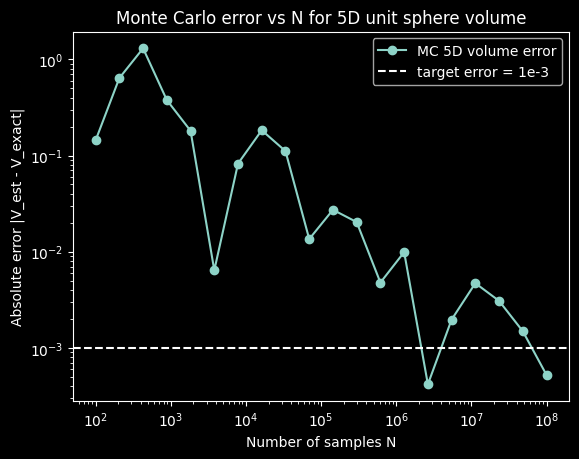

First sample size with error < 1e-3: N = 2636650.8987303553, error = 4.182e-04


In [ ]:
# 6. 


plt.figure()
plt.loglog(Ns_sphere, vol_errors, 'o-', label="MC 5D volume error")
plt.axhline(1e-3, linestyle='--', label="target error = 1e-3")
plt.xlabel("Number of samples N")
plt.ylabel("Absolute error |V_est - V_exact|")
plt.title("Monte Carlo error vs N for 5D unit sphere volume")
plt.legend()
plt.show()

# find the N where error < 1e-3
for N, err in zip(Ns_sphere, vol_errors):
    if err < 1e-3:
        print(f"First sample size with error < 1e-3: N = {N}, error = {err:.3e}")
        break



### Task 7 - Wrap up

1. **Were there any questions that were confusing?**

   Nothing, it was good. 

2. **Any other feedback?**

   Looking forward to go deeper in Monte Carlo Simulation in the future, always wanted to do that.
